#### Université Paul Sabatier, M2MAPI3
# Big data - practical 1: perceptron and SVM
We advise to use [matplotlib](https://matplotlib.org/) for plots and [numpy](https://numpy.org/). The online documentation contains information regarding the use of these libraries how to use these libraries.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
import math as math
import numpy as np
import numpy.random as npr

## Exercice 1: estimation of the mean of a univariate random variable

Let $x_1,\ldots,x_n$ be real numbers, their mean is given by
$$\bar{x} = \arg\min_y f(y) $$
Where 
$$f \colon y \mapsto \frac{1}{n} \sum_{i=1}^n (y-x_i)^2$$
The following code generates input data and plots f. 

Empirical mean:
5.5


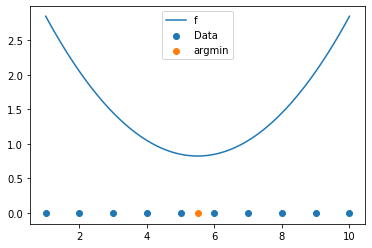

In [2]:
n = 10
x = np.linspace(1,10,10)
print("Empirical mean:")
print(np.mean(x))

plt.scatter(x, np.zeros(10), label = "Data")
plt.scatter(5.5, 0, label = "argmin")
y = np.linspace(10,100,100)/10
plt.plot(y, 1/n*(y**2 - 2 * np.mean(x) * y + np.mean(x**2)), label = "f")
plt.legend();

**Question 0:** what are the inputs? what is the argmin? what is the min?

**Les entrées sont les 10 entiers compris entre 1 et 10      
L'argmin est leur moyenne:**         
$f'(x)=\frac{1}{n}\sum\limits_{i=1}^{n} 2(y-x_{i})$   
**qui s'annule pour:**          
$y=\frac{1}{n}\sum\limits_{i=1}^{n}x_{i}=\bar{x}$            
**En cette valeur la fonction $f$ vaut:  
$\frac{1}{n} \sum\limits_{i=1}^{n} (\bar{x}-x_{i})²=\text{var}((x_{1},...x_{n}))$**

**Question 1:** Implement the gradient descent algorithm on $f$ with $y_0 = 2$ and stepsize equal to $1/3$.
\begin{align*}
    y_{k+1} &= y_k - f'(y_k) / 3
\end{align*}
We set $f_k = f(y_k)$ for each $k$. Plot $f_k - f^*$ in logarithmic scale as a function of $k$. Plot the value of $|y_k - y^*|$, where $y^*$ is the argmin, as a function of $k$ in logarithmic scale. What can you say about these results? 

In [3]:
def f_p(y):
    return 2*(y-np.mean(x))

In [4]:
f_p(5.5)

0.0

In [5]:
def gradient_descent(y0,nbIter):
    S=[y0] #premier itéré
    pt=[np.abs(y0-np.mean(x))] #première erreur
    for k in range(nbIter):
        S.append(S[-1]-f_p(S[-1])/3)
        pt.append(np.abs(S[-1]-np.mean(x)))
    return S,pt

size of pt: 21


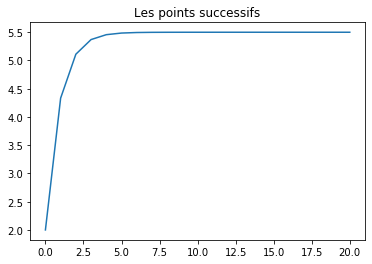

Finish= 5.49999999899621


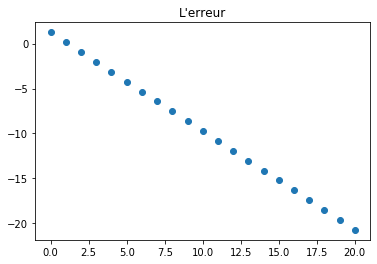

In [6]:
nbIter=20
y0=2
S,pt=gradient_descent(y0,nbIter)
print("size of pt:",len(pt))
plt.plot(S)
plt.title("Les points successifs")
plt.show()
plt.scatter(np.arange(len(pt)),np.log(pt))
plt.title("L'erreur")
print("Finish=",S[-1])

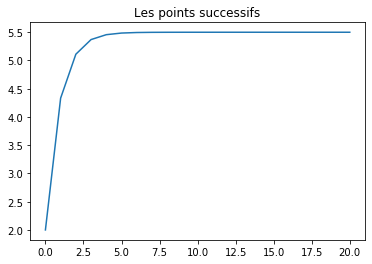

Finish= 5.49999999899621


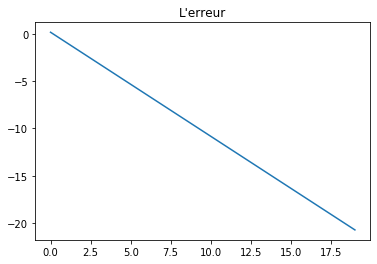

In [7]:
nbIter=20
S=[2]
pt=[]
for k in range(nbIter):
    S.append(S[-1]-f_p(S[-1])/3)
    pt.append(np.abs(S[-1]-np.mean(x)))
plt.plot(S)
plt.title("Les points successifs")
plt.show()
plt.plot(np.log(pt))
plt.title("L'erreur")
print("Finish=",S[-1])

**L'argmin est atteint en une dizaine d'itérations**

We are going to introduce minibatching strategies, we need the following
* $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes
* $(I_k)_{k \in \mathbb{N}}$ a sequence of independant random integers uniformly distributed on $\{1,\ldots, n\}$.

**Question 2:** how can you simulate the sequence $(I_k)_{k \in \mathbb{N}}$? Provide an illustration bellow

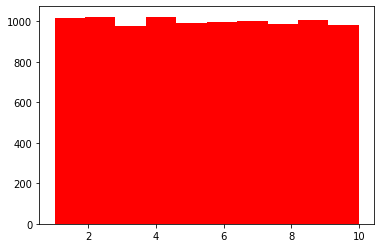

In [8]:
k=10000
I=[]
for i in range(k):
    I.append(np.random.randint(1,n+1))
plt.hist(I,color='r');


The following algorithm is an application of the minibatch gradient descent strategy on $f$. To compute $\bar{x}$. 
given $y_0 \in \mathbb{R}$ and $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes:
\begin{align*}
    I_k &\sim U(\{1,\ldots,n\})\\
    y_{k+1} &= y_k - \alpha_k (y_k - x_{I_k})
\end{align*}

**Question 3** What is the expectation of $y_{k+1}$ given $y_k$? How does this algorithm relate to the gradient descent algorithm? How is it different?

**L'espérance de $y_{k+1}$ sachant $y_{k}$ est $y_{k}-\alpha_{k}y_{k}+\alpha_{k}\bar{x}$          
 Dans le cas de la descente de gradient, on avait $y_{k+1}=y_k-\alpha y_{k}+\alpha\bar{x}$        
 Les différences entre les deux sont donc le caractère fixe ou non du pas et le fait que dans le cas de la descente de gradient on détermine $y_{k+1}$ en fonction de $y_{k}$ de façon totalement déterministe.     
Dans ce nouvel algorithme $y_{k+1}$ est aléatoire. C'est son espérance sachant $y_{k}$ qui est connue**

**Question 4** Implement 300 iterations of this algorithm with $y_0 = 2$. Try constant step size $\alpha_k = \alpha$ for all $k$, with  $\alpha = 0.5, 0.1, 0.02$. Represent the iterates $y_k$ as a function of $k$. Make comments about the behavior of the algorithm. Is it similar to what you observed for gradient descent? How does the step size affects the result?

In [9]:
def minibatch_descent(y0,nbIter,a):
    S=[y0]
    pt=[np.abs(y0-np.mean(x))]
    for k in range(nbIter):
        I=np.random.randint(0,10)
        S.append(S[-1]-a[k]*(S[-1]-x[I]))
        pt.append(np.abs(S[-1]-np.mean(x)))
    return S,pt

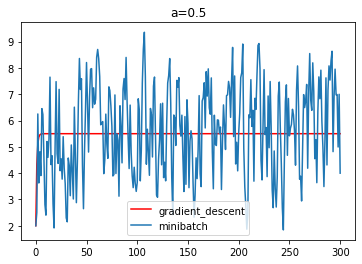

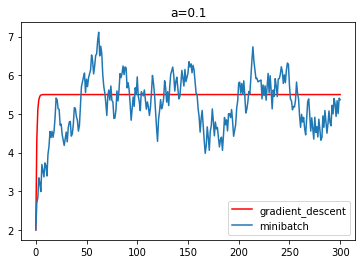

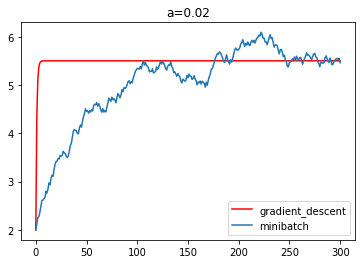

In [10]:
y0=2
nbIter=300
for a in [0.5,0.1,0.02]:
    plt.plot(gradient_descent(y0,nbIter)[0],label="gradient_descent",color='r')
    plt.plot(minibatch_descent(y0,nbIter,a*np.ones(nbIter))[0],label="minibatch")
    plt.title("a="+str(a))
    plt.legend()
    plt.show()

**L'algorithme converge mais de façon bruité du fait de son caractère aléatoire. Plus le pas est petit plus les résultats sont satisfaisants.**

**Question 5:** Try the same algorithm with a step size of the form $\alpha_k = 1 / (k+1)$ for all $k$. Represent three runs of the algorithm on the same graph with 1000 iterations. Comments the results. 

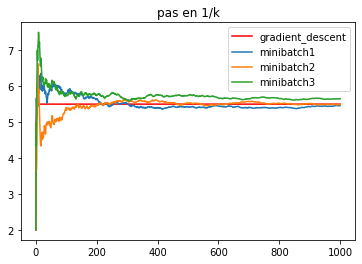

In [11]:
y0=2
nbIter=1000
a=[1/(k+1) for k in range(1,nbIter+1)]
plt.plot(gradient_descent(y0,nbIter)[0],label="gradient_descent",color='r')
for i in range(3):
    plt.plot(minibatch_descent(y0,nbIter,a)[0],label="minibatch"+str(i+1))
    plt.title("pas en 1/k")
    plt.legend()
plt.show()

**Les premieres itérations ont des allures qui peuvent être éloignées de la solution optimale mais à l'infini ils sont bien convergents**

**Question 6:** Experiment with different step size regimes. Which conclusions can you make regarding these experiments? Comment on the sensitivity of the minibatch strategy to step sizes. Is the proposed minibatching strategy a good algorithm to estimate the mean? In which situation would it be favorable to use this strategy?

**On essaie d'abord un pas en $\frac{1}{k^{2}}$ puis un pas en $\frac{1}{\sqrt{k}}$ (respectivement plus petit et plus grand que le précédent)**

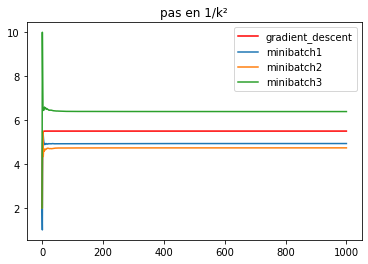

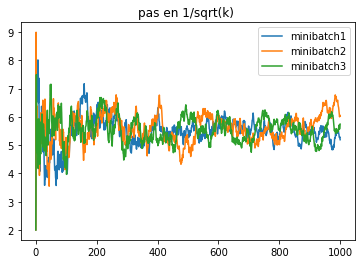

In [12]:
a1=[1/(k**2+1) for k in range(nbIter)]
a2=[1/(np.sqrt(k)+1) for k in range(nbIter)]
plt.plot(gradient_descent(y0,nbIter)[0],label="gradient_descent",color='r')
for i in range(3):
    plt.plot(minibatch_descent(y0,nbIter,a1)[0],label="minibatch"+str(i+1))
    plt.title("pas en 1/k²")
    plt.legend()
plt.show()
for i in range(3):
    plt.plot(minibatch_descent(y0,nbIter,a2)[0],label="minibatch"+str(i+1))
    plt.title("pas en 1/sqrt(k) ")
    plt.legend()
plt.show()

**Le pas en $\frac{1}{k^{2}}$ a une allure lisse mais il ne converge pas nécessairement vers la vraie valeur. A l'inverse, le pas en $\frac{1}{\sqrt{k}}$ est très bruité mais il se stabilise autour de la valeur optimale recherchée**

## Exercice 2: single layer perceptron (1957)

The following code provides a two label dataset in $\mathbb{R}^2$:      
$x_1,\ldots, x_n$ is a set of $n$ vectors in $\mathbb{R}^2$ and $y_1,\ldots,y_n$ are the corresponding labels ($-1$ or $1$). 

$X$ is a table of size $n \times 2$ and $y$ is a vector of labels of size $n$ (0 or 1). We also provide functions which allow to plot data and plot a line which equation is given by 
$$w^Tx + b = 0$$
for a vector $w \in \mathbb{R}^2$ and a bias term $b \in \mathbb{R}$.

In [13]:
## Generate data
n = 200
angles = 2 * math.pi * npr.rand(n) - math.pi / 4
radii = npr.rand(n) * 0.4 + 0.8
x1 = radii * np.cos(angles)
x2 = radii * np.sin(angles)
X = np.vstack((x1,x2)).transpose()
y = 1. * (angles > 3*math.pi/4) * 2 - 1

temp = y==-1.
X[temp,0] = X[temp,0] - 1
X[temp,1] = X[temp,1] + 0.5

## Functions for plots
def addline(w, b, label, xlim = (-2,1), ylim = (-1,2)):
    ## Adds a line to a plot
    if abs(w[1]) < 1e-3:
        ytemp = np.arange(ylim[0] * 100, ylim[1] * 100) / 100
        xtemp = - ytemp * w[1] / w[0] - b / w[0]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()
        
    else:
        xtemp = np.arange(xlim[0] * 100, xlim[1] * 100) / 100
        ytemp = - xtemp * w[0] / w[1] - b / w[1]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()


def plotData(X,y):
    ## Plot data
    for k in (-1,1):
        temp = y==k
        plt.plot(X[temp,0], X[temp,1], '.', label = k)

    plt.legend()
    plt.axis('equal')

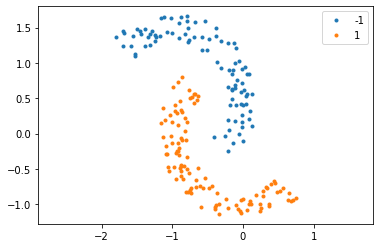

In [14]:
## Example of usage

plotData(X,y)
#addline((10,10), 10, "line 1")
#addline((1,-2), 0.8, "line 2")


The perceptron algorithm aims at building a classifier of the form
\begin{align*}
    f_{w,b} \colon x \mapsto \mathrm{sign}(w^Tx + b)
\end{align*}
where $w \in \mathbb{R}^2$ and $b \in \mathbb{R}$ are weights and bias parameters.
The perceptron learning algorithm goes as follows: start with $w_0 \in \mathbb{R}^2$, $b_0 \in \mathbb{R}$ and iterate for $k \in \mathbb{N}$:
\begin{align*}
    &I_k  \sim U(\{1,\ldots, n\})\\
    &\begin{cases}
            w_{k+1} &= w_k + \alpha y_{I_k} x_{I_k} \qquad &b_{k+1} = b_k + \alpha y_{I_k}  \qquad &\text{ if } (w^Tx_{I_k}+b) y_{I_k} < 0 \\
        w_{k+1} &= w_k  \qquad &b_{k+1} = b_k  \qquad &\text{ otherwise }
    \end{cases}
\end{align*}
where $\alpha$ is a step parameter.

**Question 7:** Implement the algorithm and plot the data as well as the decision boundary given by the final iterate. Use the following parameters
* initialize weights $w$ and bias $b$ to be equal to $1$
* 500 iterations
* $\alpha_k = 1$ for all $k$.

Plot data and the decision boundary corresponding to 5 different runs on the same picture. Print also the value of the bias and weight vector at the last iteration.

In [15]:
def perceptron(X,y,nbIter,w0,b0,a):
    n=X.shape[0]   
    W=[w0]
    B=[b0]
    
    for k in range(nbIter):
        w=W[-1]
        I=np.random.randint(0,n)
        x=X[I]
        b=B[-1]
        if ((w[0]*x[0]+w[1]*x[1]+b)*y[I]<0):
            W.append(w+a[k]*y[I]*x)
            B.append(b+a[k]*y[I])
        else:
            W.append(w)
            B.append(b)
    return W,B

Last w:  [-2.15416709 -5.71975953]
Last b:  0.0


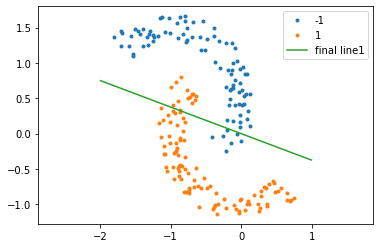

In [16]:
plotData(X,y)
w0=np.array([1,1])
b0=1
nbIter=500
a=[1 for k in range(nbIter)]
for i in range(1):
    W,B=perceptron(X,y,nbIter,w0,b0,a)
    addline(W[-1],B[-1],label='final line'+str(i+1))
    print("Last w: ",W[-1])
    print("Last b: ",B[-1])
plt.show()

**Question 8:** What happens if you increase the number of iterations or change the step size? Can you explain what you observe? Does the algorithm seem to converge?

Last w:  [ 0.8492717 -1.646361 ]
Last b:  0.0
Last w:  [ 0.04537903 -2.96727435]
Last b:  -1.0
Last w:  [-2.48522154 -4.84981878]
Last b:  0.0
Last w:  [-4.58882273 -5.57504282]
Last b:  -2.0
Last w:  [-4.12240753 -5.34660322]
Last b:  0.0


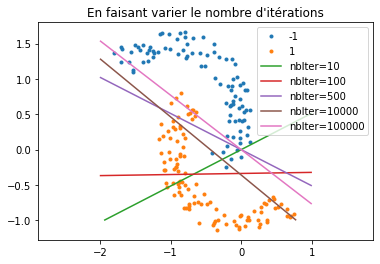

In [17]:
plotData(X,y)
w0=[1,1]
b0=1
for nbIter in [10,100,500,10000,100000]:
    a=[1 for k in range(nbIter)]
    W,B=perceptron(X,y,nbIter,w0,b0,a)
    addline(W[-1],B[-1],label="nbIter="+str(nbIter))
    print("Last w: ",W[-1])
    print("Last b: ",B[-1])
plt.title("En faisant varier le nombre d'itérations")
plt.show()

**On peut voir que le nombre de pas a une forte influence sur la solution finale. Plus le nombre de pas est grand mieux l'hyperplan construit sépare les données.**

Last w:  [-2393.52874071 -4365.79271253]
Last b:  -999.0
Last w:  [-193.56941701 -481.80759824]
Last b:  1.0
Last w:  [-21.13521083 -50.34693833]
Last b:  -9.0
Last w:  [-2.57589668 -5.03978346]
Last b:  -1.0
Last w:  [-0.35752823 -0.39646427]
Last b:  1.3877787807814457e-16
Last w:  [ 0.54523324 -0.39096599]
Last b:  0.5299999999999996


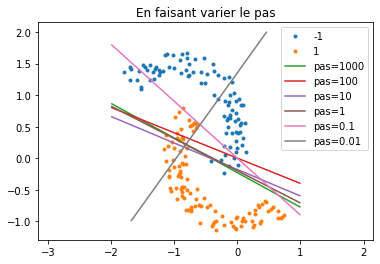

In [18]:
plotData(X,y)
w0=[1,1]
b0=1
nbIter=500
pas=[10**(-k) for k in range(-3,3)]
for i in range(len(pas)):
    a=[pas[i] for k in range(nbIter)]
    W,B=perceptron(X,y,nbIter,w0,b0,a)
    addline(W[-1],B[-1],label="pas="+str(pas[i]))
    print("Last w: ",W[-1])
    print("Last b: ",B[-1])
    i+=1
plt.title("En faisant varier le pas")            
plt.show()

**L'amplitude du pas va de paire avec le nombre d'itérations. Plus on considère un pas élevé moins le nombre d'itérations nécessaire à la convergence est grand. En revanche la solution finale peut être éloignée de celle souhaitée. L'inverse se produit lorsque lon considère un pas petit.**

**Question 9:** consider a sequence of step sizes of the form $\alpha_k = 1 / \sqrt{k+1}$ for all $k$? What happens when the number of iteration increases say to $4000$, or $40000$?

Last w:  [-0.24952864 -0.29134572]
Last b:  -0.052057883132184644
Last w:  [-0.0145721  -0.02406988]
Last b:  -0.0036598765942357147


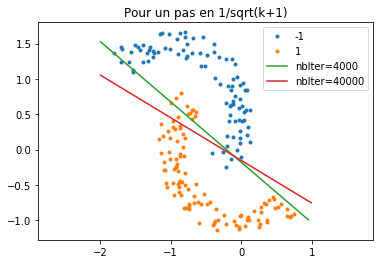

In [19]:
plotData(X,y)
w0=[1,1]
b0=1
for nbIter in [4000,40000]:
    a=[np.sqrt(1/(k+1)) for k in range(nbIter)]
    W,B=perceptron(X,y,nbIter,w0,b0,a)
    addline(W[-1],B[-1],label="nbIter="+str(nbIter))
    print("Last w: ",W[-1])
    print("Last b: ",B[-1])
plt.title("Pour un pas en 1/sqrt(k+1)")            
plt.show()

The perceptron algorithm attempts to minimize the following loss function 
\begin{align*}
    (perceptron) \qquad \min_{w,b} \frac{1}{n} \sum_{i=1}^n l_{\mathrm{perceptron}}(w^T x_i + b, y_i)
\end{align*}
where $l_{\mathrm{perceptron}}(s,y) = \max\{0, -ys\}$ for all $s$. It is actually a (sub)gradient method exactly of the same kind as what we have used in Exercise 1.

**Question 9:** Try to explain the preceeding algorithm in light of these elements. What is the solution to this minimization problem? Does it explain the behaviour observed in your experiments? Try to understand in which sense the algorithm is performing (sub)gradient descent, you may think about the loss function $l_{\mathrm{perceptron}}$ to be piecewise differentiable.

$l_{\mathrm{perceptron}}(w^{T}x_{i}+b,y_{i}) = 
\begin{cases}
           -y_{i}(w^{T}x_{i}+b)  \qquad & \text{si signe}(w^{T}x_{i}+b)\neq \text{signe}(y_{i})\\
        0 \qquad &\text{ sinon }
 \end{cases}$              
 Donc             
 $\frac{\delta}{\delta b} l_{\mathrm{perceptron}}(w^{T}x_{i}+b,y_{i})=
 \begin{cases}
           -y_{i}  \qquad & \text{si signe}(w^{T}x_{i}+b)\neq \text{signe}(y_{i})\\
        0 \qquad &\text{ sinon }
 \end{cases}$            
 $\frac{\delta}{\delta w} l_{\mathrm{perceptron}}(w^{T}x_{i}+b,y_{i})=
 \begin{cases}
           -y_{i}x_{i}  \qquad & \text{si signe}(w^{T}x_{i}+b)\neq \text{signe}(y_{i})\\
        0 \qquad &\text{ sinon }
 \end{cases}$                
 L'algorithme du perceptron que l'on a implémenté sert donc à minimiser cette fonction de perte par une descente de gradient. On a remplacé la moyenne empirique $\frac{1}{n}\sum_{i=1}^{n}$ par une variable de loi uniforme sur $(1,2,...,n)$.

## Exercise 3: Support Vector Machine
Make sure that you finish exercise 2 before starting this one.


The support vector machine is given by the solution of
\begin{align*}
    (SVM) \qquad \min_{w,b} C \sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i) + \frac{1}{2} \|w\|^2 
\end{align*}
where $l_{\mathrm{SVM}}(s,y) = \max\{0,1 -ys\}$ for all $s$.
The purpose of this section is to derive an algorithm following similar ideas as the perceptron to find a solution for the SVM problem. 



**Question 10:** use [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from `scikit-learn` library to solve the SVM problem for $C=1/10$. The kernel should be `'linear'`. Provide the value for the weight and intercept solutions. What happens if you change the value of $C$?

Score:  0.905
W= [-0.78961078 -1.63912608]


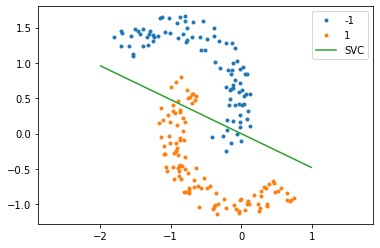

In [20]:
plotData(X,y)
from sklearn.svm import SVC
model=SVC(C=1/10,kernel='linear')
model.fit(X,y)
print("Score: ",model.score(X,y))
W=model.coef_[0]
print("W=",W)
addline(W,0,label="SVC")

Score:  0.54
W= [ 0.00136085 -0.11812794]


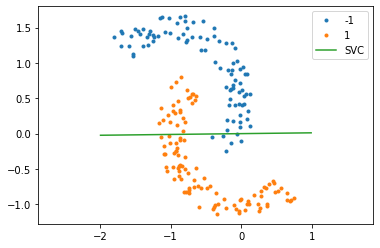

In [21]:
plotData(X,y)
from sklearn.svm import SVC
model=SVC(C=0.001,kernel='linear')
model.fit(X,y)
print("Score: ",model.score(X,y))
W=model.coef_[0]
print("W=",W)
addline(W,0,label="SVC")

Score:  0.92
W= [-2.96172117 -3.9559491 ]


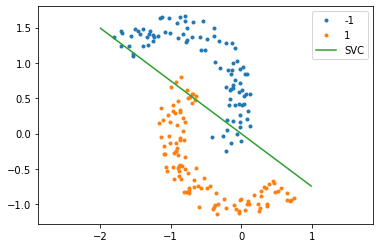

In [22]:
plotData(X,y)
from sklearn.svm import SVC
model=SVC(C=10,kernel='linear')
model.fit(X,y)
print("Score: ",model.score(X,y))
W=model.coef_[0]
print("W=",W)

addline(W,0,label="SVC")

**Question 11:** We are going to consider an intermediate problem which is simpler than the SVM problem. Consider the unregularized SVM
\begin{align*}
    (pseudo-SVM) \qquad \min_{w,b} \frac{1}{n}\sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i)
\end{align*}
By analogy with the perceptron (the loss is almost the same), derive an algorithm to solve this problem. Perform the same experiment as what you did with the perceptron, using the following parameters
* initialize weights $w$ and bias $b$ to be equal to $0$
* 1000 iterations
* $\alpha_k = 1 / \sqrt{1+k}$ for all $k$.

What happens? What is the difference with the perceptron? Comment on the importance of the loss function.

In [23]:
def pseudo_svm(X,y,nbIter,w0,b0,a):
    n=X.shape[0]   
    W=[w0]
    B=[b0]
    
    for k in range(nbIter):
        w=W[-1]
        I=np.random.randint(0,n)
        x=X[I]
        b=B[-1]
        if ((w[0]*x[0]+w[1]*x[1]+b)*y[I]<1):
            W.append(w+a[k]*y[I]*x)
            B.append(b+a[k]*y[I])
        else:
            W.append(w)
            B.append(b)
    return W,B

Last w pseudo_svm:  [-1.70432148 -2.62422695]
Last b pseudo_svm:  0.1064822311669322
Last w perceptron:  [-0.45699571 -0.57854381]
Last b perceptron:  0.0948423349500046


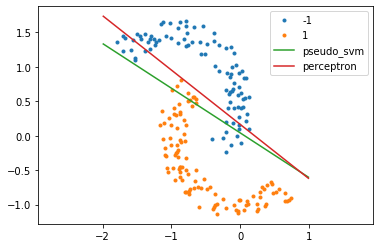

In [24]:
plotData(X,y)
w0=np.array([0,0])
b0=0
nbIter=500
a=[np.sqrt(1/(k+1)) for k in range(nbIter)]
for i in range(1):
    w0=np.array([0,0])
    b0=0
    W,B=pseudo_svm(X,y,nbIter,w0,b0,a)
    print("Last w pseudo_svm: ",W[-1])
    print("Last b pseudo_svm: ",B[-1])
    addline(W[-1],B[-1],label='pseudo_svm')
    w0=np.array([1,1])
    b0=1
    W,B=perceptron(X,y,nbIter,w0,b0,a)
    addline(W[-1],B[-1],label='perceptron')
    print("Last w perceptron: ",W[-1])
    print("Last b perceptron: ",B[-1])
plt.show()

**Question 12:** Based on the previous question, devise an algorithm for the $(SVM)$ problem. This should be based on the response of question 11 with the idea that $(SVM)$ is a linear combination between the loss of $(pseudo-SVM)$ and the $L^2$ norm which gradient you know, with scaling factors $Cn$ and $1/2$. Reproduce the preceeding experiment with the following setting
* initialize weights $w$ and bias $b$ to be equal to $0$
* 10000 iterations
* $\alpha_k = 1 / (50 + k)$ for all $k$.

Which difference do you notice? Can you explain it?

In [34]:
def my_svm(X,y,nbIter,w0,b0,a,C=1.,plot_distance=False):
    n=X.shape[0]   
    W=[w0]
    B=[b0]
    liste_points=[]
    for k in range(nbIter):
        w=W[-1]
        I=np.random.randint(0,n)
        x=X[I]
        b=B[-1]
        if ((w[0]*x[0]+w[1]*x[1]+b)*y[I]<1):
            W.append(w+(C*n*x*y[I]-w)*a[k])
            B.append(b+C*n*y[I]*a[k])
        else:
            W.append(w*(1-a[k]))
            B.append(b)
        if (plot_distance and k%100==0):
            liste_points.append(W[-1])
    if plot_distance:
        return W,B,np.array(liste_points)
    else:
        return W,B

Last w my_svm:  [-1.84690989 -2.82103823]
Last b my_svm:  -0.04596754377213573


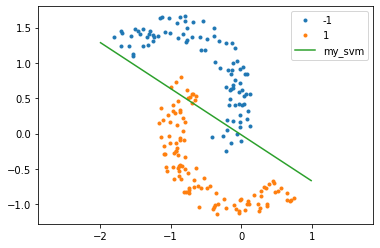

In [35]:
plotData(X,y)
w0=np.array([0,0])
b0=0
nbIter=10000
a=[1/(k+50) for k in range(nbIter)]
for i in range(1):
    w0=np.array([0,0])
    b0=0
    W,B=my_svm(X,y,nbIter,w0,b0,a)
    print("Last w my_svm: ",W[-1])
    print("Last b my_svm: ",B[-1])
    addline(W[-1],B[-1],label='my_svm')
    w0=np.array([1,1])
    b0=1
plt.show()

**Question 13:** Consider the previous experiment, for a single run, plot the distance between the current iterate and the solution given by `scikit-learn` in logarithmic scale. Plot data points should be computed every 100 iterates

Last w my_svm:  [-1.7923187  -2.78358096]
Last b my_svm:  -0.10284075547309376


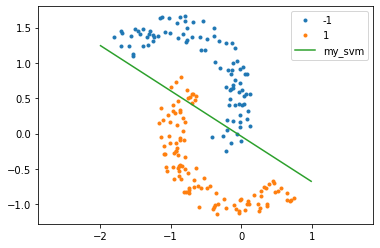

In [36]:
plotData(X,y)
w0=np.array([0,0])
b0=0
nbIter=10000
a=[1/(k+50) for k in range(nbIter)]
for i in range(1):
    w0=np.array([0,0])
    b0=0
    W,B,liste_points=my_svm(X,y,nbIter,w0,b0,a,plot_distance=True)
    print("Last w my_svm: ",W[-1])
    print("Last b my_svm: ",B[-1])
    addline(W[-1],B[-1],label='my_svm')
    w0=np.array([1,1])
    b0=1
plt.show()

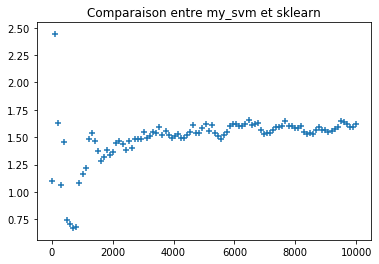

In [48]:
erreur=np.abs(model.coef_[0]*np.ones((100,2))-liste_points)
erreur=np.array([np.linalg.norm(model.coef_[0]-liste_points[k]) for k in range(liste_points.shape[0])])
plt.scatter(np.linspace(0,10000,100),erreur,marker='+')
plt.title("Comparaison entre my_svm et sklearn");

**Question 14:** Given $S_k = \frac{1}{k} \sum_{i=1}^k w_i$ and $w_{k+1}$, find a simple formula for $S_{k+1} = \frac{1}{k+1} \sum_{i=1}^k w_i$ without recomputing the sum.

Consider the previous experiment, but instead of $w_k$ and $b_k$ use the averages over all previously seen iterations:
\begin{align*}
    \bar{w}_k = \frac{1}{k} \sum_{i=1}^k w_i \\
    \bar{b}_k = \frac{1}{k} \sum_{i=1}^k b_i \\
\end{align*}
What is the effect of averaging? Use step size $\alpha_k = 0.1 / (500 +  \sqrt{k})$ for all $k$. What do you observe?

## Exercice 4: Back to the perceptron.

**Bonus question:** Getting back to the perceptron algorithm, run the algorithm with the following parameters
* initialize weights $w$ and bias $b$ to be equal to $1$
* 100000 iterations
* $\alpha_k = 10 / (10 + k)$ for all $k$.

Represent $5$ runs of the algorithm. What do you observe? In which sense does the algorithm seem to converge? If you can find a consistent explaination with a correct mathematical proof, I invite you to the restaurant.

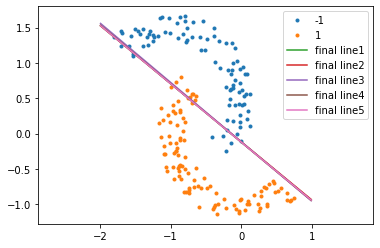

In [49]:
plotData(X,y)
w0=np.array([1,1])
b0=1
nbIter=100000
a=[10/(10+k) for k in range(nbIter)]
for i in range(5):
    W,B=perceptron(X,y,nbIter,w0,b0,a)
    addline(W[-1],B[-1],label='final line'+str(i+1))
    #print("Last w: ",W[-1])
    #print("Last b: ",B[-1])
plt.show()

# FIN

**Fait par Youness Khanjar M2MApI3**